# INCOME CLASS PREDICTION USING MACHINE LEARING

Hello all, for this classification task I have used the Census Income Data Set from UCI <br>
(https://archive.ics.uci.edu/ml/datasets/census+income)

In [1]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize']=(16, 8.27) #set graphs size to A4 dimensions
sns.set_style('darkgrid')
sns.set(font_scale = 1.4)

In [2]:
#import train and test set from UCI links

train = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

test = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 
              'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train.columns = col_labels
test.columns = col_labels

Let's get deeper and exploring the data

# TRAIN SET

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
train.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
#find out numerical and categorical features for train set

numerical_features=[feature for feature in train.columns if train[feature].dtype!='O']
categorical_features=[feature for feature in  train.columns if  train[feature].dtype=='O' and feature!='wage_class']

print('categorical features: ''\n',categorical_features)
print('\n')
print('numerical features: ''\n',numerical_features)

categorical features: 
 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


numerical features: 
 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [7]:
#Check for missing values
for feature in train.columns:
    print(feature,':', train[feature].isnull().sum())

age : 0
workclass : 0
fnlwgt : 0
education : 0
education_num : 0
marital_status : 0
occupation : 0
relationship : 0
race : 0
sex : 0
capital_gain : 0
capital_loss : 0
hours_per_week : 0
native_country : 0
wage_class : 0


In [8]:
#Find out distinct values for each numerical feature
for feature in numerical_features:
    print(feature,':', train[feature].nunique())

age : 73
fnlwgt : 21648
education_num : 16
capital_gain : 119
capital_loss : 92
hours_per_week : 94


In [9]:
#Find out distinct values for each categorical feature
for feature in categorical_features:
    print(feature,':', train[feature].nunique())

workclass : 9
education : 16
marital_status : 7
occupation : 15
relationship : 6
race : 5
sex : 2
native_country : 42


In [10]:
#for each categorical value we calculate relative frequency of unique classes.
for feature in categorical_features:
    freq=train[feature].value_counts('f').rename_axis(feature).reset_index(name='relative frequency')
    print('\n')
    print(freq)



           workclass  relative frequency
0            Private            0.697030
1   Self-emp-not-inc            0.078038
2          Local-gov            0.064279
3                  ?            0.056386
4          State-gov            0.039864
5       Self-emp-inc            0.034274
6        Federal-gov            0.029483
7        Without-pay            0.000430
8       Never-worked            0.000215


        education  relative frequency
0         HS-grad            0.322502
1    Some-college            0.223918
2       Bachelors            0.164461
3         Masters            0.052916
4       Assoc-voc            0.042443
5            11th            0.036086
6      Assoc-acdm            0.032769
7            10th            0.028654
8         7th-8th            0.019840
9     Prof-school            0.017690
10            9th            0.015786
11           12th            0.013298
12      Doctorate            0.012684
13        5th-6th            0.010227
14        1st-4t

In [11]:
#Check for imbalanced target (In our case 76% are in class <=50K and 24% >50K)
train['wage_class'].value_counts('f') 

 <=50K    0.75919
 >50K     0.24081
Name: wage_class, dtype: float64

### Now let's do some graphs for train set in order to find key relationships !!!

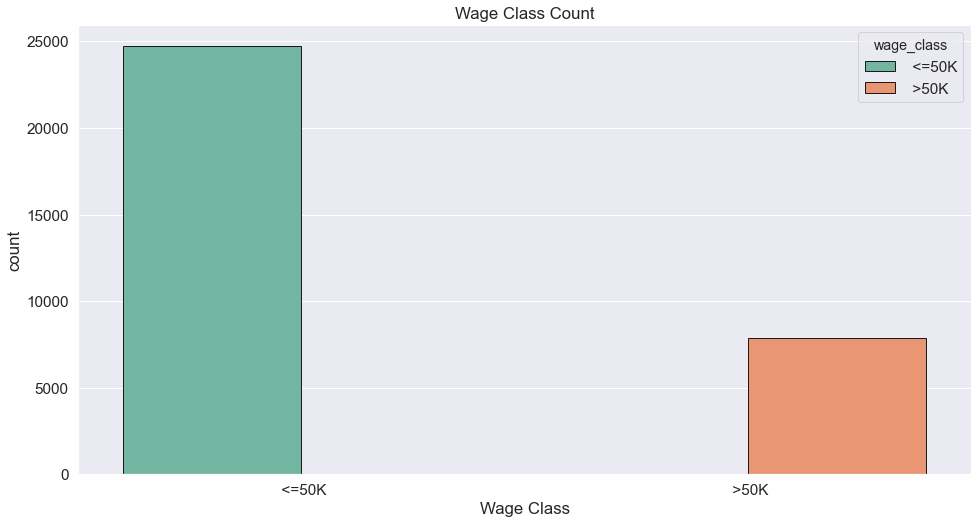

In [12]:
ax=sns.countplot(train['wage_class'],hue=train['wage_class'],edgecolor='k',palette='Set2')
ax.set_title('Wage Class Count')
ax.set_xlabel('Wage Class')
plt.show()

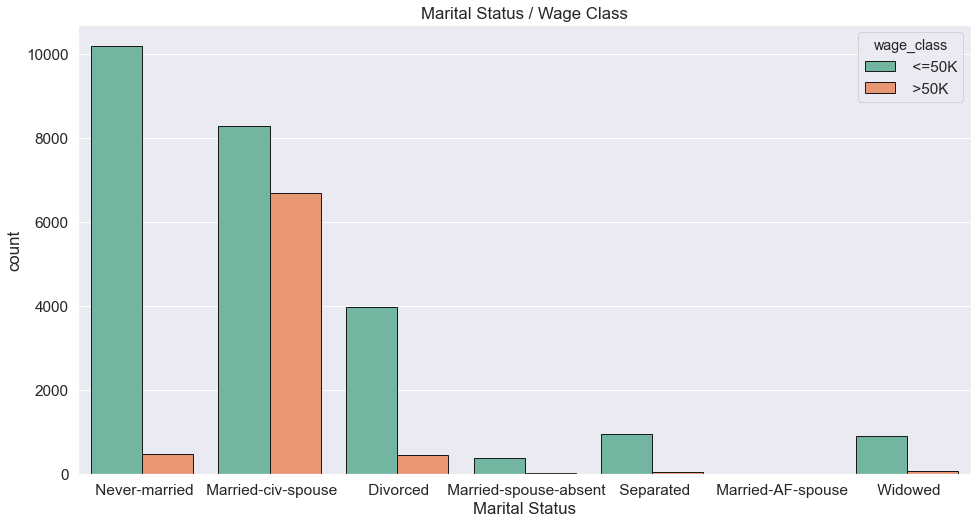

In [13]:
ax=sns.countplot(train['marital_status'], hue=train['wage_class'],edgecolor='k',palette='Set2')
ax.set_title('Marital Status / Wage Class')
ax.set_xlabel('Marital Status')
plt.show()

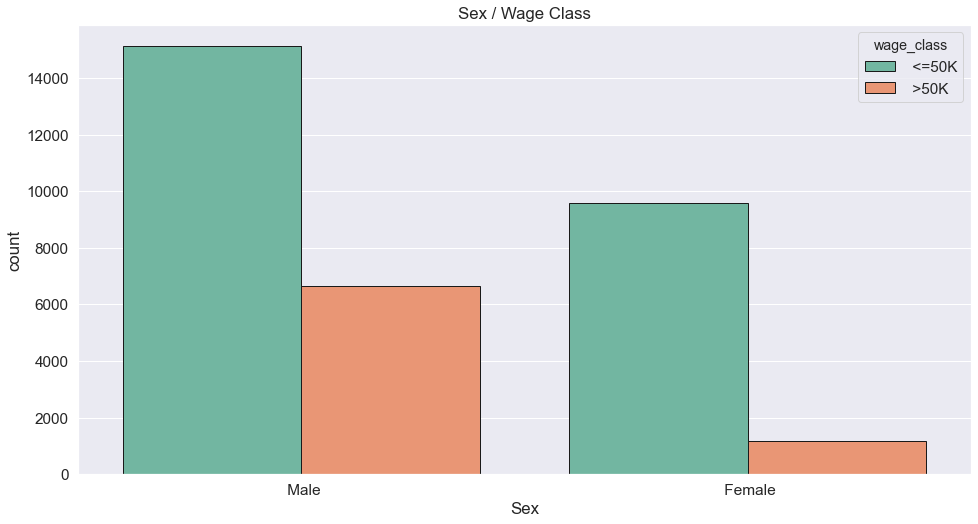

In [14]:
ax=sns.countplot(train['sex'], hue=train['wage_class'],edgecolor='k',palette='Set2')
ax.set_title('Sex / Wage Class')
ax.set_xlabel('Sex')
plt.show()

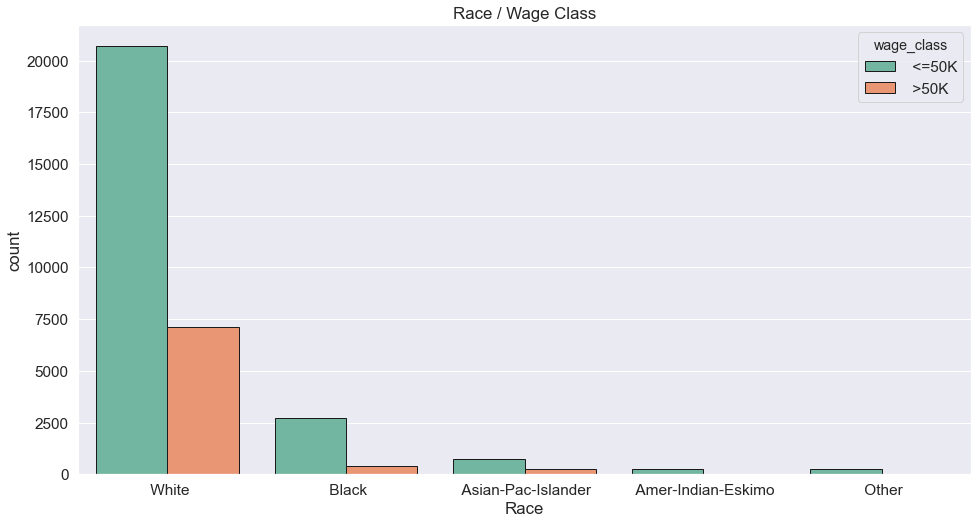

In [15]:
ax=sns.countplot(train['race'], hue=train['wage_class'],edgecolor='k',palette='Set2')
ax.set_title('Race / Wage Class')
ax.set_xlabel('Race')
plt.show()

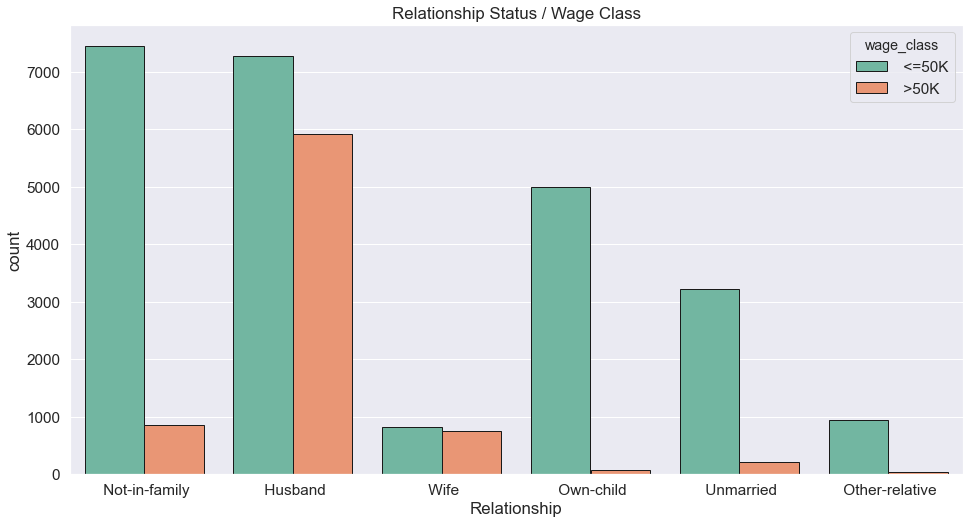

In [16]:
ax=sns.countplot(train['relationship'], hue=train['wage_class'],edgecolor='k',palette='Set2')
ax.set_title('Relationship Status / Wage Class')
ax.set_xlabel('Relationship')
plt.show()

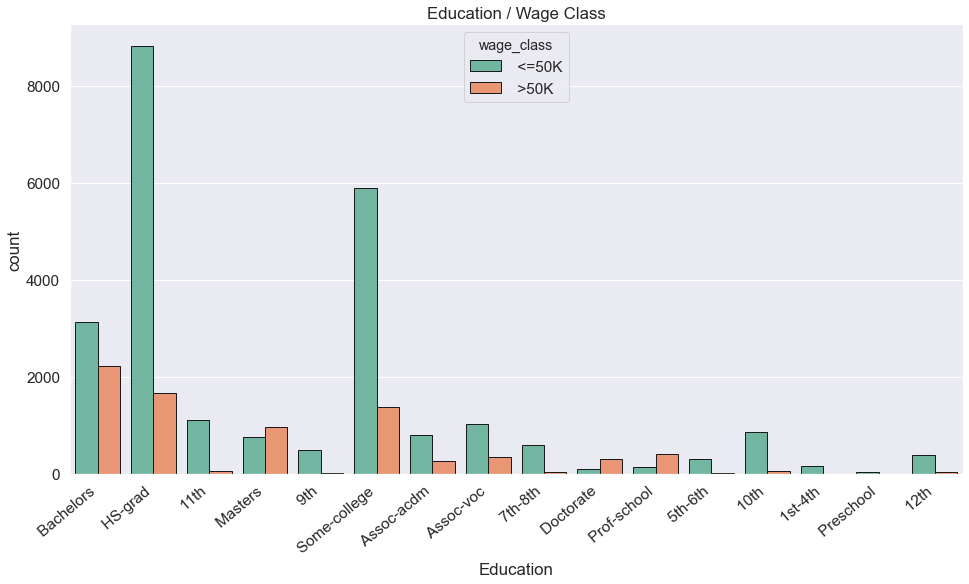

In [17]:
ax=sns.countplot(train['education'], hue=train['wage_class'],edgecolor='k',palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Education / Wage Class')
ax.set_xlabel('Education')
plt.show()

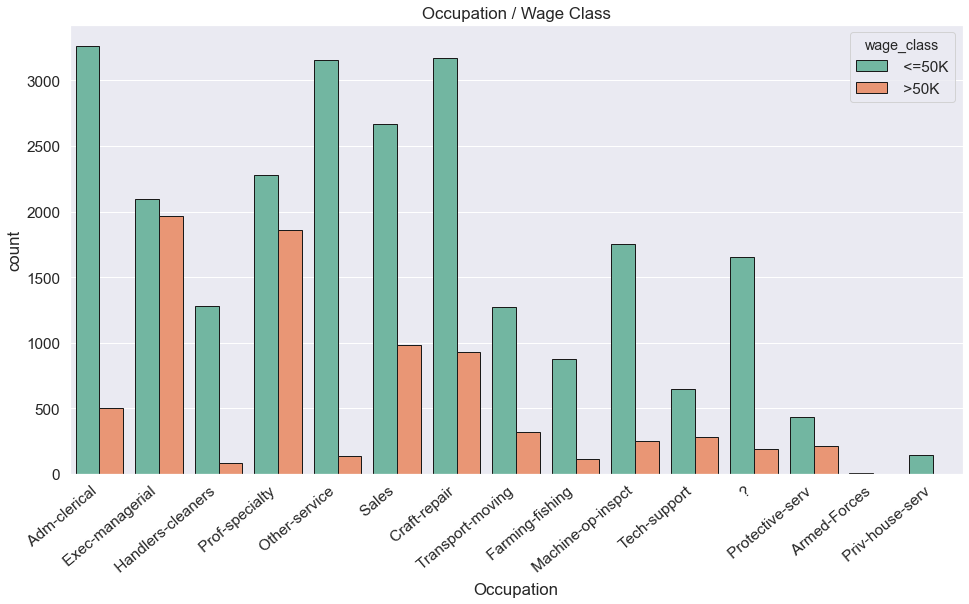

In [18]:
ax=sns.countplot(train['occupation'], hue=train['wage_class'],edgecolor='k',palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Occupation / Wage Class')
ax.set_xlabel('Occupation')
plt.show()

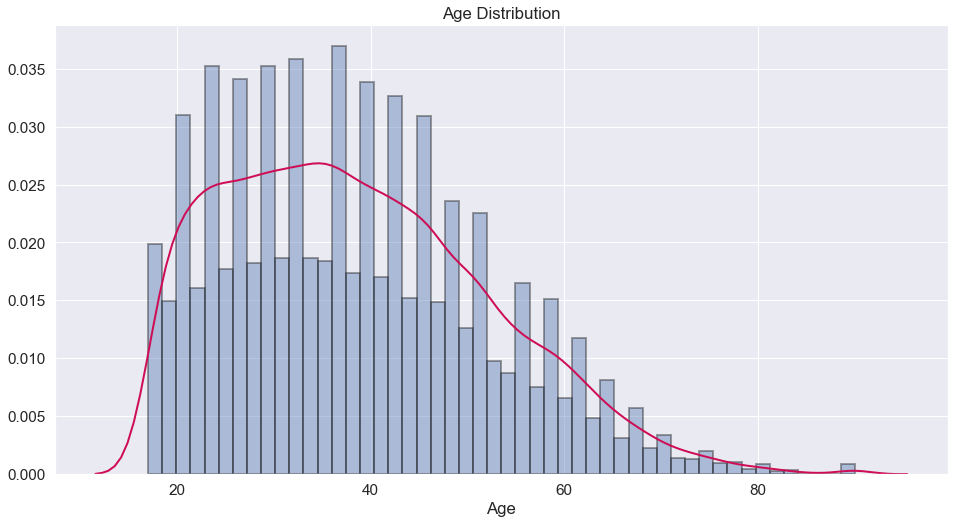

In [19]:
ax=sns.distplot(train['age'],hist_kws=dict(edgecolor="k", linewidth=2),kde_kws={"color": "#ce0d55", "lw": 2})
ax.set_title('Age Distribution')
ax.set_xlabel('Age')
plt.show()

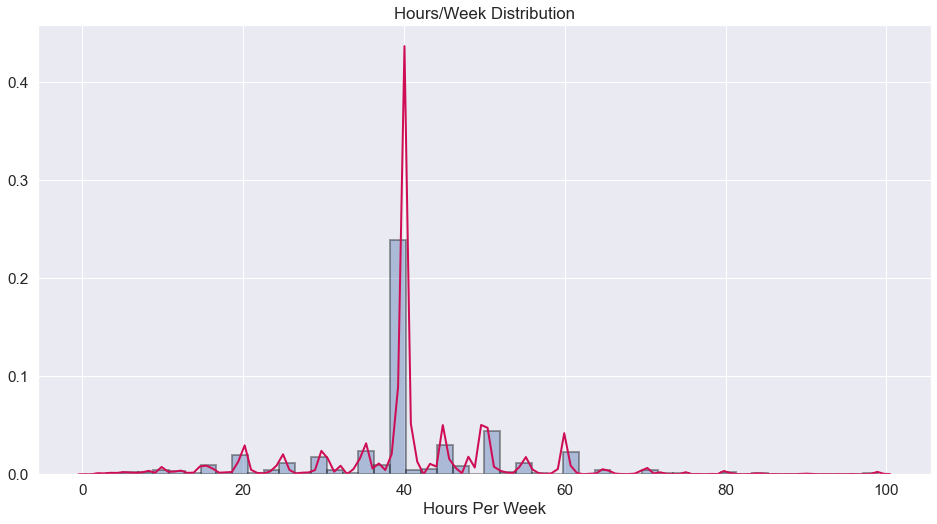

In [20]:
ax=sns.distplot(train['hours_per_week'],hist_kws=dict(edgecolor="k", linewidth=2),kde_kws={"color": "#ce0d55", "lw": 2})
ax.set_title('Hours/Week Distribution')
ax.set_xlabel('Hours Per Week')
plt.show()

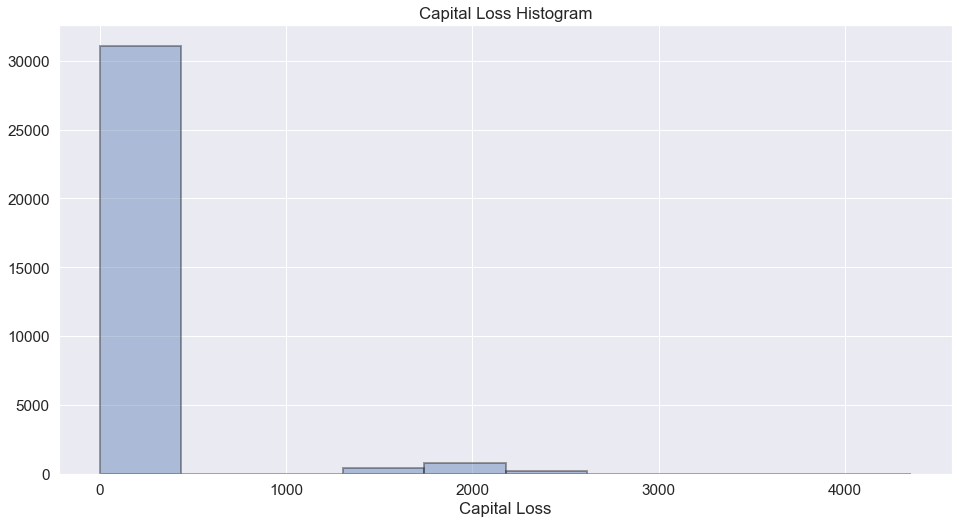

In [21]:
ax=sns.distplot(train['capital_loss'],bins=10,kde=False,hist_kws=dict(edgecolor="k", linewidth=2))
ax.set_title('Capital Loss Histogram')
ax.set_xlabel('Capital Loss')
plt.show()

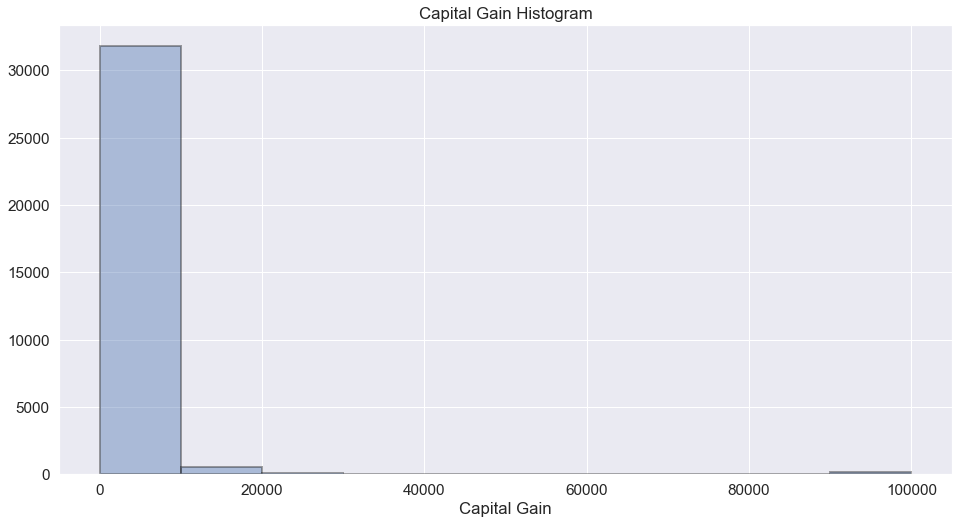

In [22]:
ax=sns.distplot(train['capital_gain'],bins=10,kde=False,hist_kws=dict(edgecolor="k", linewidth=2))
ax.set_title('Capital Gain Histogram')
ax.set_xlabel('Capital Gain')
plt.show()

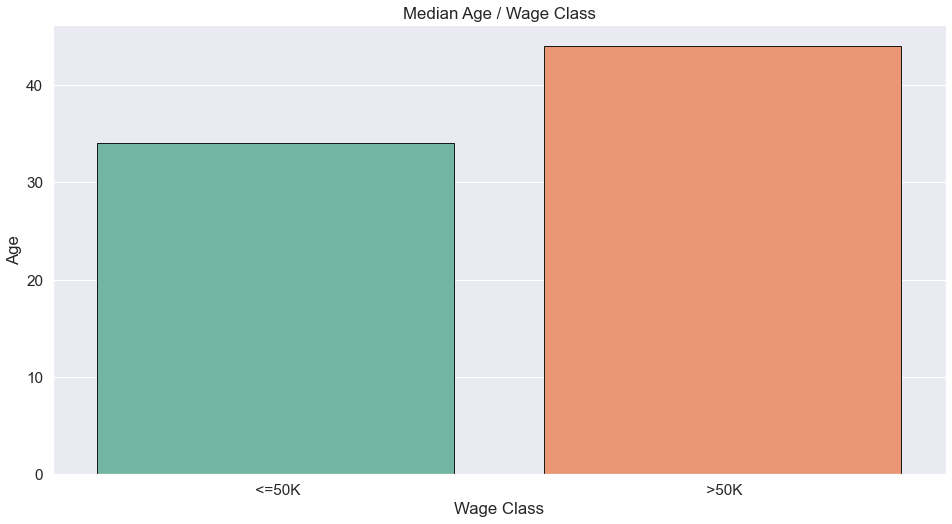

In [59]:
#median age for each wage_class
ax=sns.barplot(train.groupby('wage_class')['age'].median().index,train.groupby('wage_class')['age'].median().values,
               edgecolor='k', palette='Set2')
ax.set_ylabel('Age')
ax.set_xlabel('Wage Class')
ax.set_title('Median Age / Wage Class')
plt.show()

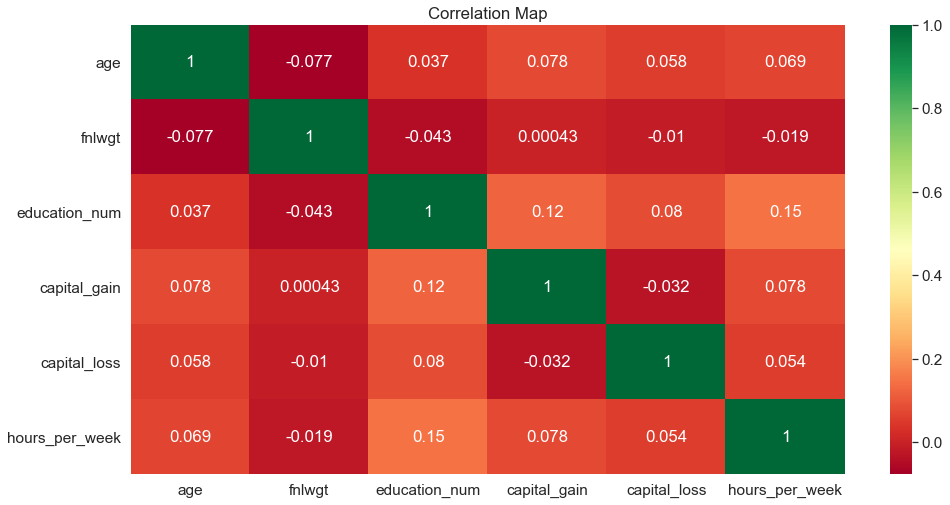

In [53]:
corr_train=train.copy()
for feature in categorical_features:
    corr_train.drop(feature,axis=1,inplace=True)

    
ax=sns.heatmap(corr_train.corr(), cmap='RdYlGn',annot=True)
ax.set_title('Correlation Map')
plt.show()

# TEST SET

Now we have to follow the same procedure for the test set in order to assure that both train set and test set come from same distribution

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education_num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital_gain    16281 non-null  int64 
 11  capital_loss    16281 non-null  int64 
 12  hours_per_week  16281 non-null  int64 
 13  native_country  16281 non-null  object
 14  wage_class      16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [25]:
test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [26]:
train.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [27]:
#find out numerical and categorical features for test set

numerical_features_test=[feature for feature in test.columns if test[feature].dtype!='O']
categorical_features_test=[feature for feature in  test.columns if  test[feature].dtype=='O' and feature!='wage_class']

print('categorical features: ''\n',categorical_features_test)
print('\n')
print('numerical features: ''\n',numerical_features_test)

categorical features: 
 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


numerical features: 
 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [28]:
#Check for missing values
for feature in test.columns:
    print(feature,':', test[feature].isnull().sum())

age : 0
workclass : 0
fnlwgt : 0
education : 0
education_num : 0
marital_status : 0
occupation : 0
relationship : 0
race : 0
sex : 0
capital_gain : 0
capital_loss : 0
hours_per_week : 0
native_country : 0
wage_class : 0


In [29]:
#Find out distinct values for each numerical feature
for feature in numerical_features_test:
    print(feature,':', test[feature].nunique())

age : 73
fnlwgt : 12787
education_num : 16
capital_gain : 113
capital_loss : 82
hours_per_week : 89


In [30]:
#Find out distinct values for each categorical feature
for feature in categorical_features_test:
    print(feature,':', test[feature].nunique())

workclass : 9
education : 16
marital_status : 7
occupation : 15
relationship : 6
race : 5
sex : 2
native_country : 41


In [31]:
#for each categorical value we calculate relative frequency of unique classes.
for feature in categorical_features_test:
    freq_test=test[feature].value_counts('f').rename_axis(feature).reset_index(name='relative frequency')
    print('\n')
    print(freq_test)



           workclass  relative frequency
0            Private            0.688533
1   Self-emp-not-inc            0.081138
2          Local-gov            0.064062
3                  ?            0.059149
4          State-gov            0.041951
5       Self-emp-inc            0.035563
6        Federal-gov            0.028991
7        Without-pay            0.000430
8       Never-worked            0.000184


        education  relative frequency
0         HS-grad            0.324489
1    Some-college            0.220318
2       Bachelors            0.163995
3         Masters            0.057367
4       Assoc-voc            0.041705
5            11th            0.039125
6      Assoc-acdm            0.032799
7            10th            0.028008
8         7th-8th            0.018979
9     Prof-school            0.015847
10            9th            0.014864
11           12th            0.013758
12      Doctorate            0.011117
13        5th-6th            0.010810
14        1st-4t

In [32]:
#Check for imbalanced target (In our case approx 76% are in class <=50K and  approx 24% >50K)
test['wage_class'].value_counts('f') 

 <=50K.    0.763774
 >50K.     0.236226
Name: wage_class, dtype: float64

## Now let's do some graphs for test in order to find key relationships !!!

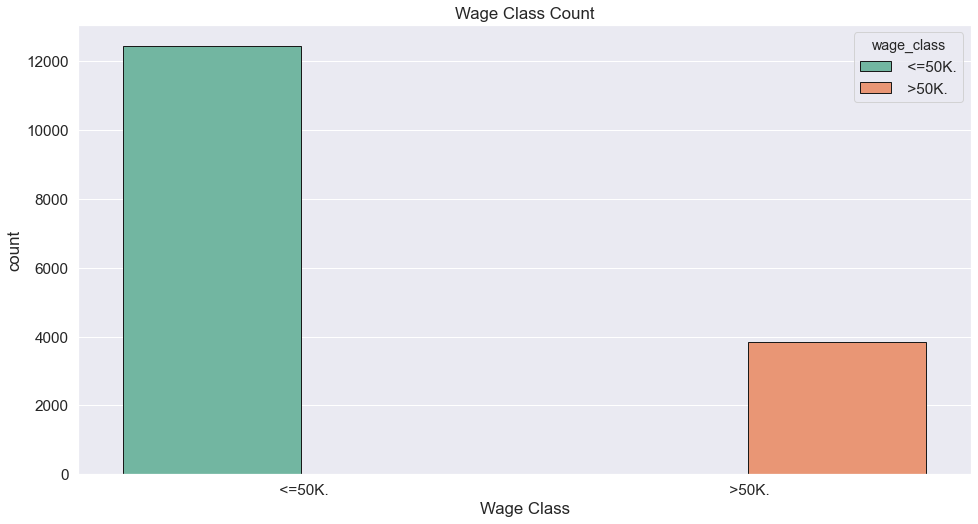

In [33]:
ax=sns.countplot(test['wage_class'],hue=test['wage_class'], edgecolor='k',palette='Set2')
ax.set_title('Wage Class Count')
ax.set_xlabel('Wage Class')
plt.show()

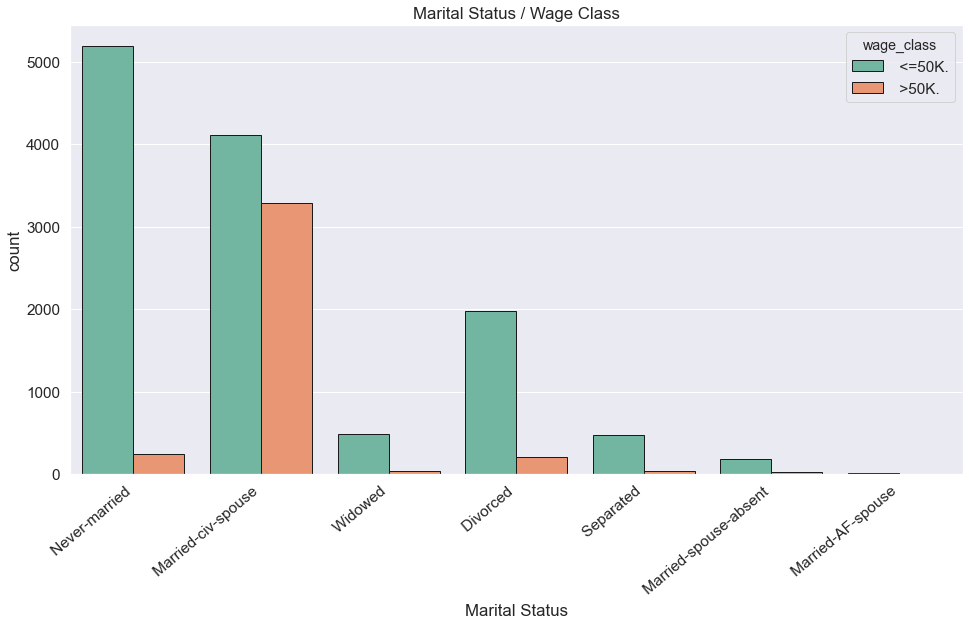

In [34]:
ax=sns.countplot(test['marital_status'], hue=test['wage_class'],edgecolor='k', palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Marital Status / Wage Class')
ax.set_xlabel('Marital Status')
plt.show()

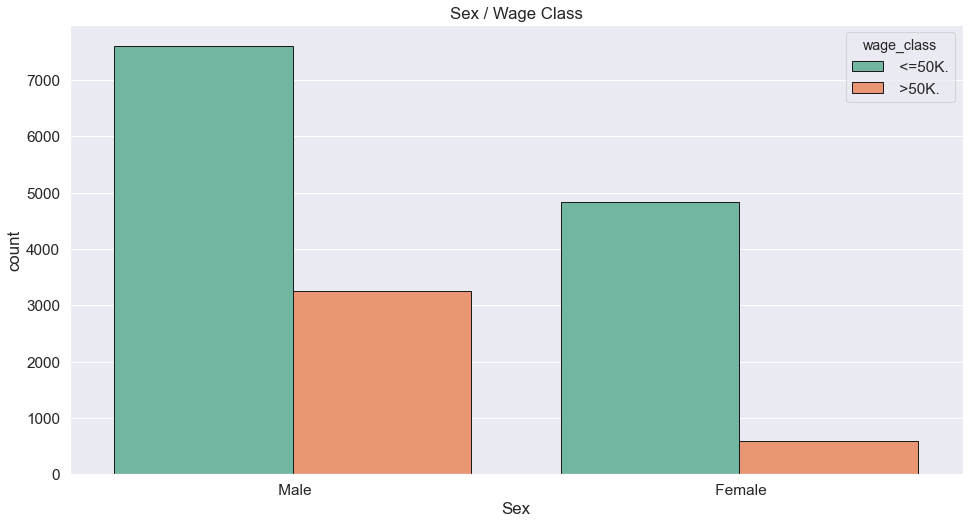

In [35]:
ax=sns.countplot(test['sex'], hue=test['wage_class'],edgecolor='k', palette='Set2')
ax.set_title('Sex / Wage Class')
ax.set_xlabel('Sex')
plt.show()

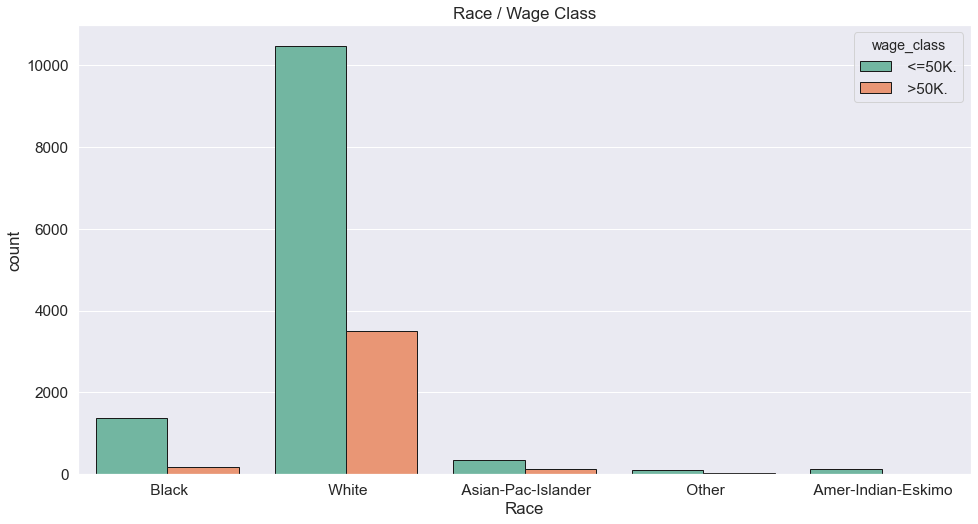

In [36]:
ax=sns.countplot(test['race'], hue=test['wage_class'],edgecolor='k', palette='Set2')
ax.set_title('Race / Wage Class')
ax.set_xlabel('Race')
plt.show()

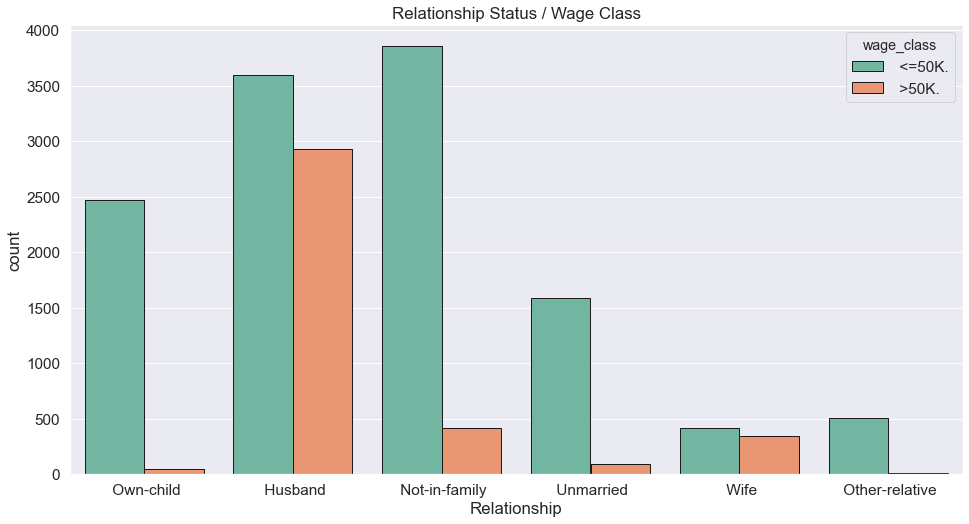

In [37]:
ax=sns.countplot(test['relationship'], hue=test['wage_class'],edgecolor='k', palette='Set2')
ax.set_title('Relationship Status / Wage Class')
ax.set_xlabel('Relationship')
plt.show()

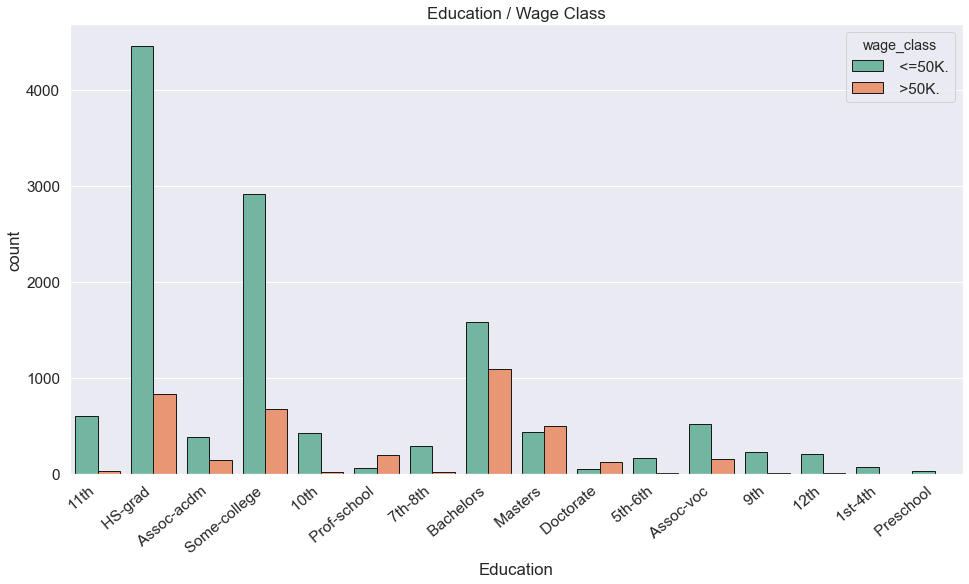

In [38]:
ax=sns.countplot(test['education'], hue=test['wage_class'],edgecolor='k', palette='Set2')
ax.set_title('Education / Wage Class')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('Education')
plt.show()

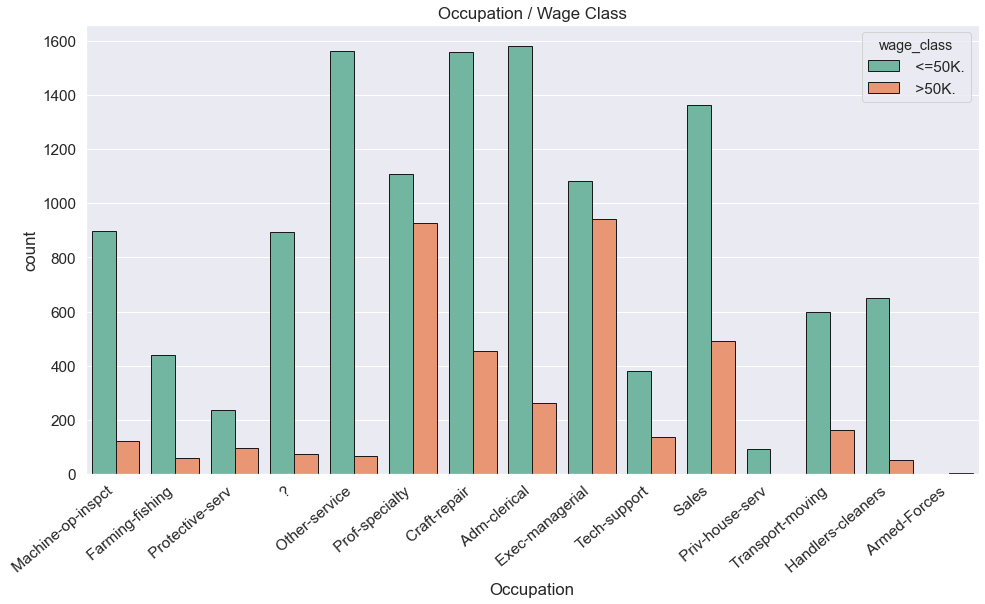

In [39]:
ax=sns.countplot(test['occupation'], hue=test['wage_class'],edgecolor='k', palette='Set2')
ax.set_title('Occupation / Wage Class')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('Occupation')
plt.show()

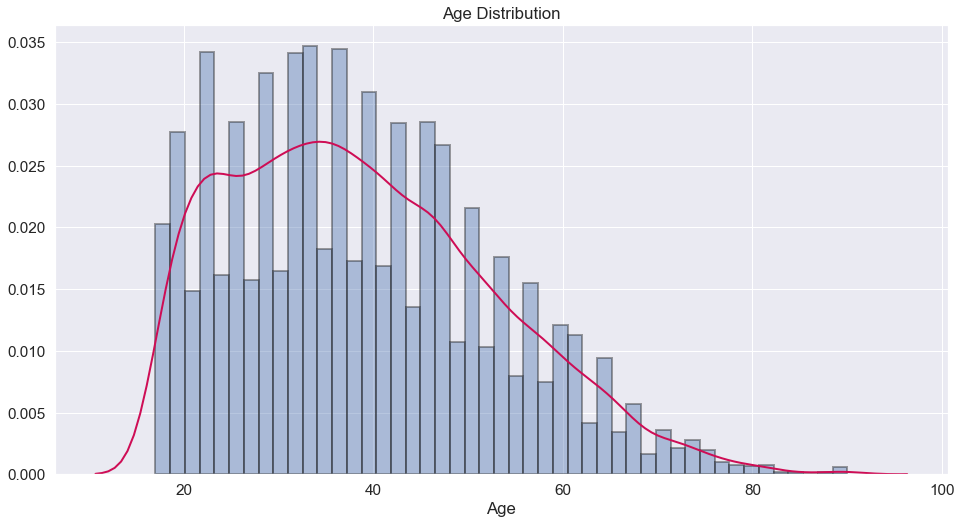

In [40]:
ax=sns.distplot(test['age'],hist_kws=dict(edgecolor="k", linewidth=2),kde_kws={"color": "#ce0d55", "lw": 2})
ax.set_title('Age Distribution')
ax.set_xlabel('Age')
plt.show()

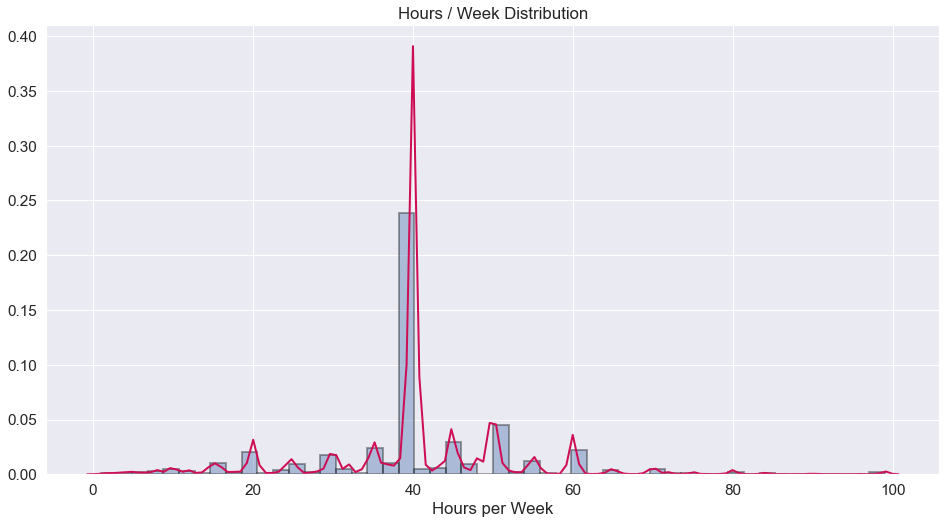

In [41]:
ax=sns.distplot(test['hours_per_week'],hist_kws=dict(edgecolor="k", linewidth=2),kde_kws={"color": "#ce0d55", "lw": 2})
ax.set_title('Hours / Week Distribution')
ax.set_xlabel('Hours per Week')
plt.show()

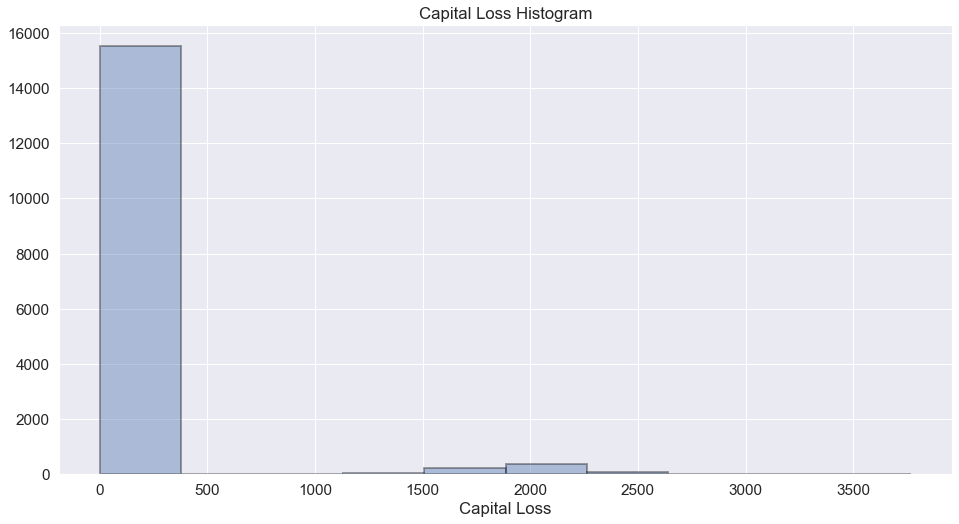

In [42]:
ax=sns.distplot(test['capital_loss'],bins=10,kde=False,hist_kws=dict(edgecolor="k", linewidth=2))
ax.set_title('Capital Loss Histogram')
ax.set_xlabel('Capital Loss')
plt.show()

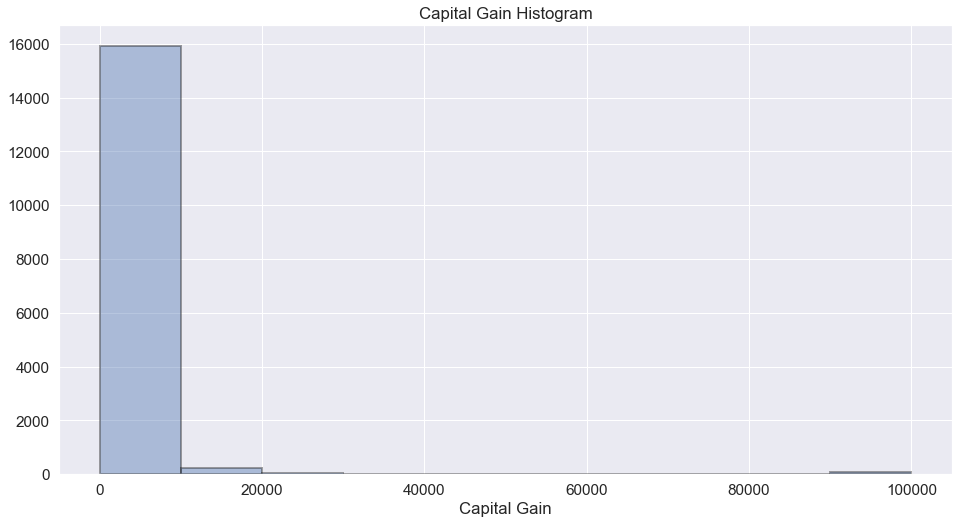

In [43]:
ax=sns.distplot(test['capital_gain'],bins=10,kde=False,hist_kws=dict(edgecolor="k", linewidth=2))
ax.set_title('Capital Gain Histogram')
ax.set_xlabel('Capital Gain')
plt.show()

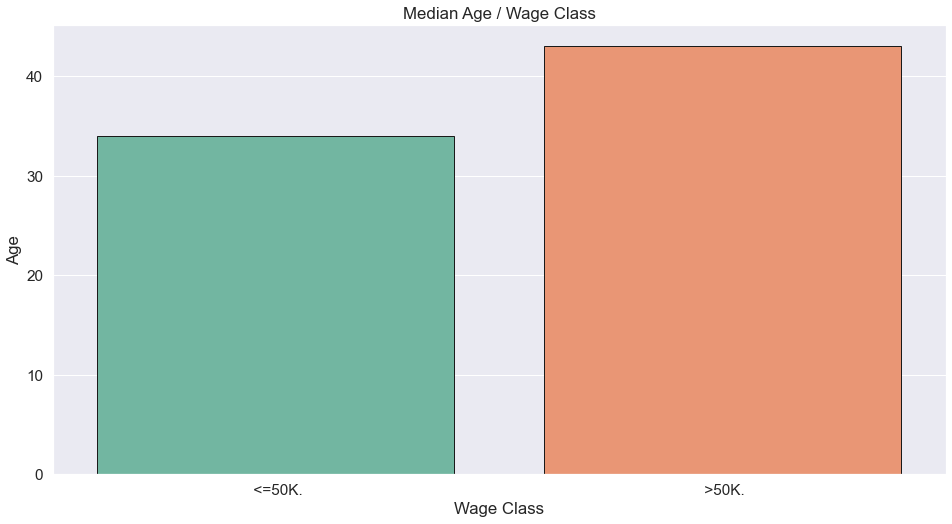

In [58]:
#median age for each wage_class
ax=sns.barplot(test.groupby('wage_class')['age'].median().index,test.groupby('wage_class')['age'].median().values,
               edgecolor='k', palette='Set2')
ax.set_ylabel('Age')
ax.set_xlabel('Wage Class')
ax.set_title('Median Age / Wage Class')
plt.show()

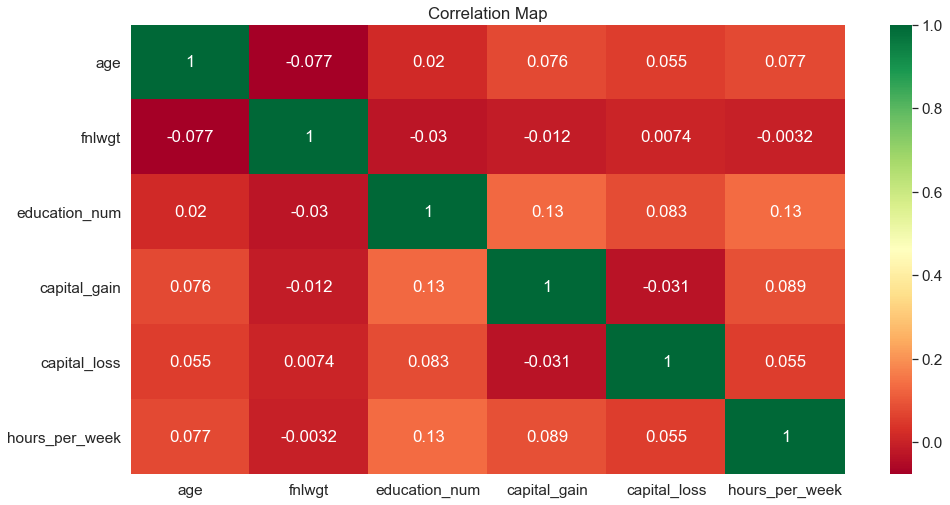

In [55]:
corr_test=test.copy()
for feature in categorical_features_test:
    corr_test.drop(feature,axis=1,inplace=True)

    
ax=sns.heatmap(corr_test.corr(), cmap='RdYlGn',annot=True)
ax.set_title('Correlation Map')
plt.show()

### In conclusion, we can clearly see that both train set and test set come from same distribution. So, it's time for Feature Engineering